In [12]:
### IMPORTAR LIBRERÍAS ###
import pandas as pd
import numpy as np

In [13]:
### IMPORTAR LOS DATOS ###
atletas = pd.read_csv('athlete_events.csv')
paises = pd.read_csv('data/noc_regions.csv')

In [14]:
atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [15]:
paises.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [16]:
#Se elimina la columna "notes" del conjunto de datos paises
paises.drop('notes', axis=1, inplace=True)
#Se renombra la columna "region" como "country" por paises
paises.rename(columns = {'region':'Country'}, inplace = True)
paises.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [17]:
#Se unen los conjuntos de datos atletas y paises
data = atletas.merge(paises,left_on = 'NOC', right_on = 'NOC', how = 'left')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [18]:
#Verificamos si existe algún atleta que haya quedado sin país
paises_nulos = data.loc[data['Country'].isnull(),['NOC','Team']].drop_duplicates()
paises_nulos

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [19]:
#Se incluye el país en las filas en donde no se encontraba
data['Country'] = np.where(data['NOC']=='SGP', 'Singapore', data['Country'])
data['Country'] = np.where(data['NOC']=='ROT', 'Refugee Olympic Athletes', data['Country'])
data['Country'] = np.where(data['NOC']=='UNK', 'Unknown', data['Country'])
data['Country'] = np.where(data['NOC']=='TUV', 'Tuvalu', data['Country'])

In [20]:
#Se elimina la columna "Team"
data.drop('Team', axis = 1, inplace = True)

In [21]:
#Se renombra la columna "name" como "Athletes"
data.rename(columns = {'Name':'Athletes'}, inplace = True)
data.head()

,ID,Athletes,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [23]:
#Conocer los tipos de datos
tipos_datos = data.dtypes
tipos_datos

ID            int64
Athletes     object
Sex          object
Age         float64
Height      float64
Weight      float64
NOC          object
Games        object
Year          int64
Season       object
City         object
Sport        object
Event        object
Medal        object
Country      object
dtype: object

In [24]:
#Conocer los datos nulos - estos datos nulos no serán tenidos en cuenta en la data final
datos_nulos = data.isnull().sum()
datos_nulos

ID               0
Athletes         0
Sex              0
Age           9474
Height       60171
Weight       62875
NOC              0
Games            0
Year             0
Season           0
City             0
Sport            0
Event            0
Medal       231333
Country          0
dtype: int64

In [26]:
!pip install seaborn

### VISUALIZACIÓN DE LOS DATOS

In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribución de Medallas de Oro')

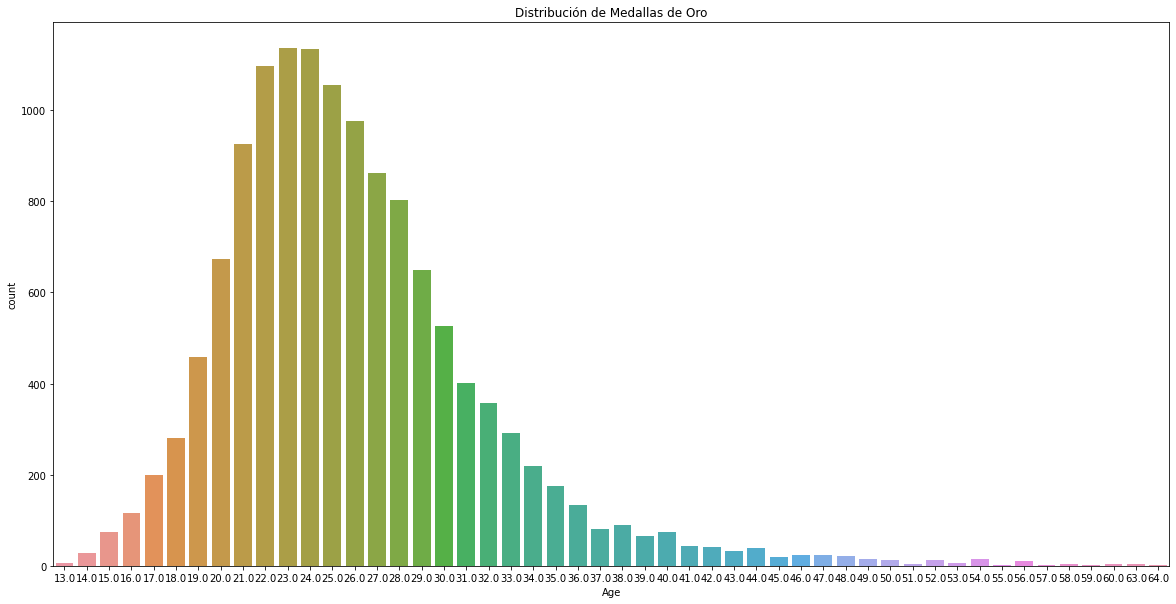

In [28]:
#Distribución de las medallas de oro por edad
oro = data[(data.Medal == 'Gold')]
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(oro['Age'])
plt.title('Distribución de Medallas de Oro')

<ipython-input-29-552f4a383da9>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribución de Medallas')

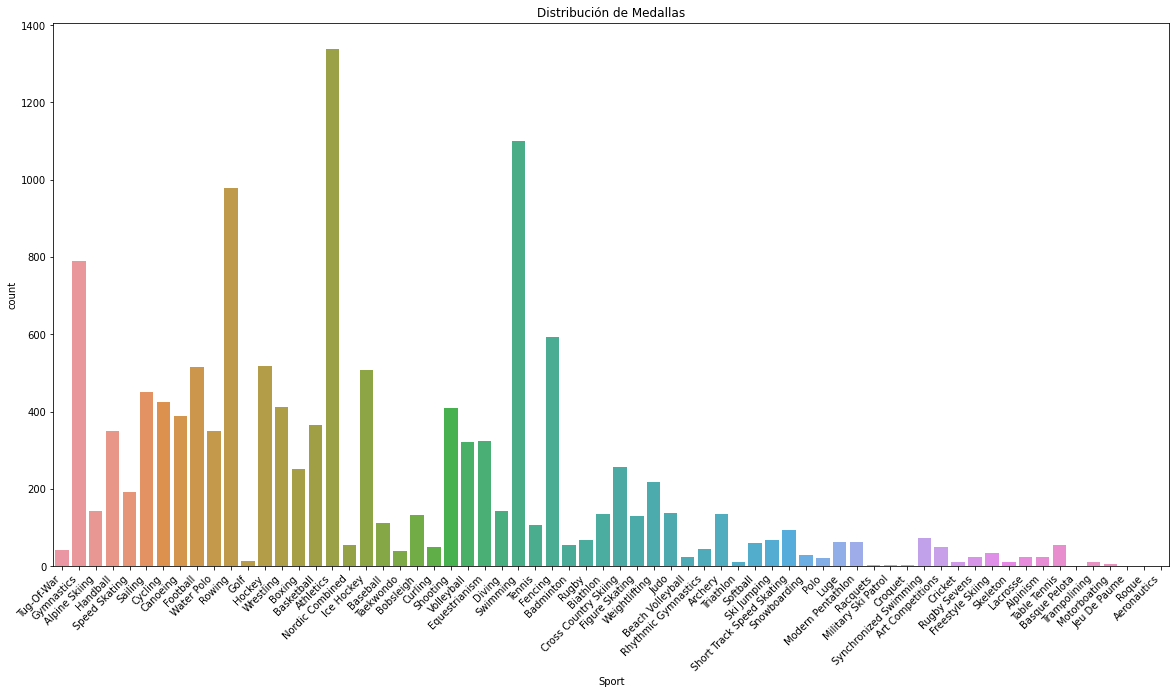

In [29]:
#Disciplinas con más medallas de oro repartidas
disciplina = oro['Sport']
plt.figure(figsize=(20,10))
plt.tight_layout()
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
sns.countplot(disciplina)
plt.title('Distribución de Medallas')

Text(0.5, 1.0, 'Medallas por País')

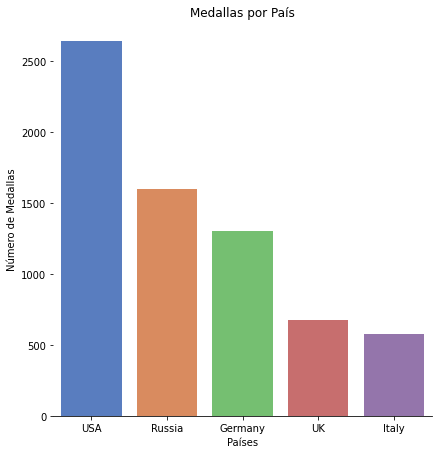

In [30]:
#Distribucipón de los 5 países con más medallas de oro
totalOro = oro.Country.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalOro,
                height=6, kind="bar", palette="muted") 
g.despine(left=True)
g.set_xlabels("Países")
g.set_ylabels("Número de Medallas")
plt.title('Medallas por País')

### PROCESAMIENTO DE LOS DATOS

In [31]:
#Se elimina toda la información anterior al año 1960
data = data.loc[(data['Year'] > 1960), :]

In [32]:
#Se elimina la información de los juegos olímpicos de invierno
data = data.loc[(data['Season'] == 'Summer'), :]

In [33]:
#Cambiar las columnas de medallas por valores numéricos
data['Gold'] = data['Medal'] == 'Gold'
data['Gold'] = data['Gold'] * 1
data['Silver'] = data['Medal'] == 'Silver'
data['Silver'] = data['Silver'] * 1
data['Bronze'] = data['Medal'] == 'Bronze'
data['Bronze'] = data['Bronze'] * 1

data['Female'] = data['Sex'] == 'F'
data['Female'] = data['Female'] * 1

In [34]:
#Se agrupa la información por país de atletas, deportes y eventos particiádos
data_final = pd.DataFrame(data.groupby(['Year', 'NOC', 'Country'])
                          ['Athletes','Sport','Event'].nunique())
data_final.head()

<ipython-input-34-1f8f92ca5404>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_final = pd.DataFrame(data.groupby(['Year', 'NOC', 'Country'])


Athletes  Sport  Event
Year NOC Country                            
1964 AFG Afghanistan         8      1      8
     AHO Curacao             4      2      4
     ALG Algeria             1      1      7
     ARG Argentina         102     14     78
     AUS Australia         243     19    133

In [35]:
#Se agrupa la información por país de los géneros
genero = pd.DataFrame(data.groupby(['Year','NOC','Country','Athletes'])
                      ['Female'].mean())
genero = genero.groupby(['Year', 'NOC', 'Country']).sum()
data_final = data_final.merge(genero, left_index=True, right_index=True)
data_final.head()

Athletes  Sport  Event  Female
Year NOC Country                                    
1964 AFG Afghanistan         8      1      8     0.0
     AHO Curacao             4      2      4     0.0
     ALG Algeria             1      1      7     0.0
     ARG Argentina         102     14     78     6.0
     AUS Australia         243     19    133    40.0

In [36]:
#Se suman las medallas ganadas por país
medallas = pd.DataFrame(data.groupby(['Year','NOC','Country','Event'])
                        ['Medal'].nunique())
medallas = medallas.groupby(['Year','NOC','Country']).sum()
data_final = data_final.merge(medallas, left_index=True, right_index=True)
data_final.head()

Athletes  Sport  Event  Female  Medal
Year NOC Country                                           
1964 AFG Afghanistan         8      1      8     0.0      0
     AHO Curacao             4      2      4     0.0      0
     ALG Algeria             1      1      7     0.0      0
     ARG Argentina         102     14     78     6.0      1
     AUS Australia         243     19    133    40.0     18

In [37]:
#Se suman los tipos de medallas ganadas por país
medallasTipo = data.groupby(['Year','NOC','Country','Event'])['Gold','Silver','Bronze'].sum()
medallasTipo = medallasTipo.clip(upper=1)
medallasTipo = medallasTipo.groupby(['Year','NOC','Country']).sum()
data_final = data_final.merge(medallasTipo, left_index=True, right_index=True)
data_final.head()

<ipython-input-37-9c3406c0cc17>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medallasTipo = data.groupby(['Year','NOC','Country','Event'])['Gold','Silver','Bronze'].sum()


Athletes  Sport  Event  Female  Medal  Gold  Silver  \
Year NOC Country                                                            
1964 AFG Afghanistan         8      1      8     0.0      0     0       0   
     AHO Curacao             4      2      4     0.0      0     0       0   
     ALG Algeria             1      1      7     0.0      0     0       0   
     ARG Argentina         102     14     78     6.0      1     0       1   
     AUS Australia         243     19    133    40.0     18     6       2   

                      Bronze  
Year NOC Country              
1964 AFG Afghanistan       0  
     AHO Curacao           0  
     ALG Algeria           0  
     ARG Argentina         0  
     AUS Australia        10

In [38]:
#Se resetea la numeración (agregar columna index)
data_final = data_final.reset_index()
data_final.head()

,Year,NOC,Country,Athletes,Sport,Event,Female,Medal,Gold,Silver,Bronze
0,1964,AFG,Afghanistan,8,1,8,0.0,0,0,0,0
1,1964,AHO,Curacao,4,2,4,0.0,0,0,0,0
2,1964,ALG,Algeria,1,1,7,0.0,0,0,0,0
3,1964,ARG,Argentina,102,14,78,6.0,1,0,1,0
4,1964,AUS,Australia,243,19,133,40.0,18,6,2,10


In [39]:
#Se calcula la cantidad de atletas por eventos
data_final['Athletes Event'] = (data_final['Athletes'] / data_final['Event']).round(3)
data_final.head()

,Year,NOC,Country,Athletes,Sport,Event,Female,Medal,Gold,Silver,Bronze,Athletes Event
0,1964,AFG,Afghanistan,8,1,8,0.0,0,0,0,0,1.000
1,1964,AHO,Curacao,4,2,4,0.0,0,0,0,0,1.000
2,1964,ALG,Algeria,1,1,7,0.0,0,0,0,0,0.143
3,1964,ARG,Argentina,102,14,78,6.0,1,0,1,0,1.308
4,1964,AUS,Australia,243,19,133,40.0,18,6,2,10,1.827


In [40]:
#Convertimos la columna NOC en datos numéricos
data_final = pd.get_dummies(data=data_final, columns=['NOC'])
data_final.head()

,Year,Country,Athletes,Sport,Event,Female,Medal,Gold,Silver,Bronze,...,NOC_VEN,NOC_VIE,NOC_VIN,NOC_VNM,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM
0,1964,Afghanistan,8,1,8,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1964,Curacao,4,2,4,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1964,Algeria,1,1,7,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1964,Argentina,102,14,78,6.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1964,Australia,243,19,133,40.0,18,6,2,10,...,0,0,0,0,0,0,0,0,0,0


### ANÁLISIS DE MACHINE LEARNING

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [42]:
#Definir las variables dependiente e independientes
y = data_final[['Medal','Gold','Silver','Bronze','Year','Country']]
X = data_final.drop(['Medal','Gold','Silver','Bronze'], axis = 1)

In [43]:
#Separar los datos de entrenamiento y prueba - Los de prueba serán los de Rio 2016
X_train = X[X['Year'] < 2016]
X_test  = X[X['Year'] == 2016]
X_test  = X_test.reset_index().drop(['index'], axis=1)

y_train = y[y['Year'] < 2016]
y_test  = y[y['Year'] ==2016]
y_test  = y_test.reset_index().drop(['index'], axis=1)

y_test = y_test.drop(y_test[y_test['Country']=='Kosovo'].index)
y_test = y_test.drop(y_test[y_test['Country']=='Refugee Olympic Athletes'].index)
y_test = y_test.drop(y_test[y_test['Country']=='South Sudan'].index)

In [44]:
#Definir el algoritmo
algoritmo_oro = LinearRegression()
algoritmo_plata =LinearRegression()
algoritmo_bronce = LinearRegression()

In [45]:
#Entrenar el algoritmo
algoritmo_oro.fit(X_train.drop(['Country'], axis=1), y_train['Gold'])
algoritmo_plata.fit(X_train.drop(['Country'], axis=1), y_train['Silver'])
algoritmo_bronce.fit(X_train.drop(['Country'], axis=1), y_train['Bronze'])

LinearRegression()

In [46]:
#Realizar una predicción con los datos de los Juegos Olímpicos de Rio 2016
y_test['Gold Prediction'] = pd.DataFrame(
    algoritmo_oro.predict(X_test.drop(['Country'], axis=1)),
    columns=['Gold Prediction'])
y_test['Gold Prediction'] = y_test['Gold Prediction'].astype('int64')
y_test['Gold Prediction'] = y_test['Gold Prediction'].clip(lower=0)

y_test['Silver Prediction'] = pd.DataFrame(
    algoritmo_plata.predict(X_test.drop(['Country'], axis=1)),
    columns=['Silver Prediction'])
y_test['Silver Prediction'] = y_test['Silver Prediction'].astype('int64')
y_test['Silver Prediction'] = y_test['Silver Prediction'].clip(lower=0)

y_test['Bronze Prediction'] = pd.DataFrame(
    algoritmo_bronce.predict(X_test.drop(['Country'], axis=1)),
    columns=['Bronze Prediction'])
y_test['Bronze Prediction'] = y_test['Bronze Prediction'].astype('int64')
y_test['Bronze Prediction'] = y_test['Bronze Prediction'].clip(lower=0)

y_test['Medal Prediction'] = (y_test['Gold Prediction']
                              + y_test['Silver Prediction']
                              + y_test['Bronze Prediction'])

In [47]:
#Calculo de la precisión del modelo
#Calculo R2

print(r2_score(y_test['Gold'],y_test['Gold Prediction']))
print(r2_score(y_test['Silver'],y_test['Silver Prediction']))
print(r2_score(y_test['Bronze'],y_test['Bronze Prediction']))

0.8854456080359051
0.8132091940645912
0.8183181117957746


### PREDICCIÓN JUEGOS OLÍMPICOS TOKIO 2020

In [48]:
#Calculamos la media de los datos desde el 2008
tokio_2020 = data_final[data_final['Year'] >= 2008]

tokio_2020['Year'] = 2020

tokio_2020 = tokio_2020.groupby(
    ['Year','Country'])['Athletes','Sport','Event','Female'].mean().astype('int64')
tokio_2020 = tokio_2020.reset_index()

<ipython-input-48-0047b6686e08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokio_2020['Year'] = 2020
<ipython-input-48-0047b6686e08>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tokio_2020 = tokio_2020.groupby(


In [49]:
#Calculamos los atletas por eventos de acuerdo a la media
tokio_2020['Athletes Event'] = tokio_2020['Athletes'] / tokio_2020['Event']
tokio_2020['Athletes Event'] = (tokio_2020['Athletes Event'].fillna(0)).round(3)

#Unimos los datos con la información de NOC
noc = X_test.drop(['Year','Athletes','Sport','Event','Female','Athletes Event'], axis=1)
tokio_2020 = tokio_2020.merge(noc)

In [50]:
#Definir las variables dependientes e independientes
y_tokio = tokio_2020[['Year','Country']]
X_tokio = tokio_2020.drop(['Country'], axis=1)

In [51]:
#Realizar una predicción con los datos de los Juegos Olímpicos de Tokio 2020
y_tokio['Gold Prediction'] = pd.DataFrame(
    algoritmo_oro.predict(X_tokio), columns=['Gold Prediction'])
y_tokio['Gold Prediction'] = y_tokio['Gold Prediction'].astype('int64')
y_tokio['Gold Prediction'] = y_tokio['Gold Prediction'].clip(lower=0)

y_tokio['Silver Prediction'] = pd.DataFrame(
    algoritmo_plata.predict(X_tokio), columns=['Silver Prediction'])
y_tokio['Silver Prediction'] = y_tokio['Silver Prediction'].astype('int64')
y_tokio['Silver Prediction'] = y_tokio['Silver Prediction'].clip(lower=0)

y_tokio['Bronze Prediction'] = pd.DataFrame(
    algoritmo_bronce.predict(X_tokio), columns=['Bronze Prediction'])
y_tokio['Bronze Prediction'] = y_tokio['Bronze Prediction'].astype('int64')
y_tokio['Bronze Prediction'] = y_tokio['Bronze Prediction'].clip(lower=0)

y_tokio['Medal Prediction'] = (y_tokio['Gold Prediction']
                              + y_tokio['Silver Prediction']
                              + y_tokio['Bronze Prediction'])

<ipython-input-51-be4e3dffe19a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_tokio['Gold Prediction'] = pd.DataFrame(
<ipython-input-51-be4e3dffe19a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_tokio['Gold Prediction'] = y_tokio['Gold Prediction'].astype('int64')
<ipython-input-51-be4e3dffe19a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda